# Clasificación de frases según emojis.

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
import gensim.downloader as api
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [127]:
# Crear un dataset con frases y emojis
data = {
    'frase': [
        'Estoy feliz', 'Tengo hambre', "Llueve mucho hoy", 'Es un día soleado', 'Voy a trabajar',
        'Estoy cansado', 'Es viernes', 'Me siento enfermo', 'Quiero ir a la playa', 'Estoy enojado',
        'Me siento mal', 'Noche de fiesta','Tengo mucha hambre', "Estoy alegre", 'Me siento bien',
        "Está lloviendo", "Cae agua", "No quiero trabajar", "Hora de chambear", "Me gusta mi trabajo",
        "Comida", "Hace calor", "Quiero dormir", "Estoy durmiendo", "Estoy soñando",
        "El sol es amarillo", "Sol sale por el horizonte", "eres un sol", "soy feliz", "Qué alegría",
        "Tengo sueño", "Estoy enojado", "Eso me molesta", "No me molestes", "Me gusta la playa",
        "Me gusta comer", "Vamos a comer", "Quiero comida", "Estoy hambriento", "Tengo mucha hambre",
        "Está lloviendo"
    ],
    'emoji': ['😊', '🍔', '🌧', '🌞', '💼',
              '😴', '🎉', '🤒', '🏖️', '😠',
              '🤒','🎉','🍔','😊','😊',
              '🌧', '🌧','💼','💼','💼',
              '🍔', '🌞', '😴', '😴', '😴',
              '🌞','🌞','🌞','😊', '😊',
              '😴', '😠','😠','😠','🏖️',
              '🍔','🍔','🍔', '🍔','🍔',
              '🌧'
              ]
}

In [128]:
df = pd.DataFrame(data)

# Mostrar el dataset
print(df)

                        frase emoji
0                 Estoy feliz     😊
1                Tengo hambre     🍔
2            Llueve mucho hoy     🌧
3           Es un día soleado     🌞
4              Voy a trabajar     💼
5               Estoy cansado     😴
6                  Es viernes     🎉
7           Me siento enfermo     🤒
8        Quiero ir a la playa    🏖️
9               Estoy enojado     😠
10              Me siento mal     🤒
11            Noche de fiesta     🎉
12         Tengo mucha hambre     🍔
13               Estoy alegre     😊
14             Me siento bien     😊
15             Está lloviendo     🌧
16                   Cae agua     🌧
17         No quiero trabajar     💼
18           Hora de chambear     💼
19        Me gusta mi trabajo     💼
20                     Comida     🍔
21                 Hace calor     🌞
22              Quiero dormir     😴
23            Estoy durmiendo     😴
24              Estoy soñando     😴
25         El sol es amarillo     🌞
26  Sol sale por el horizont

El dataset fue generado aquí mismo en el código ya que en un documento de excel los emojis utilizados no funcionaron del todo.

In [129]:
#Transformación de texto con TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["frase"])  # Representación vectorial de las frases
y = df["emoji"]  # Etiquetas


In [130]:
#División del dataset en entrenamiento y prueba en un 80% y un 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo k-NN
k = 3# Número de vecinos
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

se colocan 3 vecinos debido a que en las pruebas realizadas con este número es con el cual el modelo hizo mejores predicciones

In [131]:
print(df["emoji"].value_counts())


emoji
🍔     8
😊     5
🌞     5
😴     5
🌧     4
💼     4
😠     4
🎉     2
🤒     2
🏖️    2
Name: count, dtype: int64


In [132]:
# Evaluación del modelo
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred,zero_division=0))


Accuracy: 0.2222222222222222
Classification Report:
              precision    recall  f1-score   support

           🌞       0.33      1.00      0.50         1
           🌧       0.00      0.00      0.00         1
           🍔       0.33      1.00      0.50         1
          🏖️       0.00      0.00      0.00         1
           💼       0.00      0.00      0.00         2
           😊       0.00      0.00      0.00         2
           😠       0.00      0.00      0.00         0
           😴       0.00      0.00      0.00         1

    accuracy                           0.22         9
   macro avg       0.08      0.25      0.12         9
weighted avg       0.07      0.22      0.11         9



La presición de modelo no es muy alta debido principalmente a que el dataset tiene muy pocos ejemplos, lo cual se puede solucionar implementando mayor número de ejemplos

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127828 (\N{HAMBURGER}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127958 (\N{BEACH WITH UMBRELLA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-pack

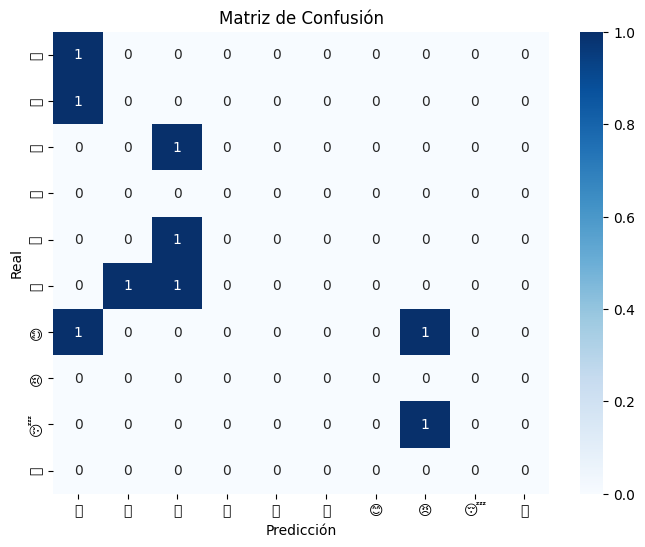

In [133]:
# Matriz de confusión y visualización
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

Los warnings obtenidos son debido a que no se reconocen los emojis utilizados

In [135]:
# Predicción en nuevas frases
nuevas_frases = ["Comida rica", "Cansada", "Hoy hace calor", "Enojada"]
X_nuevas = vectorizer.transform(nuevas_frases)
predicciones = knn.predict(X_nuevas)

for frase, emoji in zip(nuevas_frases, predicciones):
    print(f"Frase: {frase} → Predicción: {emoji}")

Frase: Comida rica → Predicción: 🍔
Frase: Cansada → Predicción: 🌧
Frase: Hoy hace calor → Predicción: 🌞
Frase: Enojada → Predicción: 🌧


Dos de las predicciones son correctas, mientras que las otras dos no lo son, esto debido a que el dataset contiene muy poca informaciòn, pero las frases que le he pasado como entrenamiento al modelo referentes a la comida han sido de mucha utilidad para que el modelo pueda predecir muy bien estas frases. Lo digo referente a la comida puesto que en el dataset existe un mayor número de frases referentes al emoji de hamburguesa